# **1. IMPORT LIBRARY**

In [1]:
# library umum
import numpy as np 
import pandas as pd  
import warnings
warnings.simplefilter('ignore')
import gc

# library keras
import tensorflow
from tensorflow import keras
from keras import models
from keras import layers
from keras import metrics
from keras.metrics import Precision
from tqdm.keras import TqdmCallback
from keras.backend import clear_session

# library sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler

# library menampilkan data
import seaborn as sns
import matplotlib.pyplot as plt

# **2. DATA UNDERSTANDING**

## **2.1. IMPORT DATA**

In [2]:
# load data
file_path = 'D:\CODING\SMT5\SoftCompPrak\DataSet\Pumpkin_Seeds_Dataset\Pumpkin_Seeds_Dataset.xlsx'
dataset = pd.read_excel(file_path, sheet_name='Pumpkin_Seeds_Dataset',engine='openpyxl')

# menghapus nilai null
dataset.dropna(inplace=True)

# menghubah class target menjadi 0/1
Encoder_Pengubah = LabelEncoder()
dataset.Class = Encoder_Pengubah.fit_transform(dataset['Class']) 

# info data
def isikolom():
    for col in dataset.columns:
        print(col, sep=' ', end=', ', flush=True)
print(f"Dataset ini berjumlah {dataset.shape[0]} baris dengan {dataset.Class.nunique()} jenis biji labu (class)")
print(f"Memiliki {len(dataset.columns)} kolom berisi : ")
isikolom()
print(f"\n{dataset.Class.nunique()} jenis (class) biji labu tersebut adalah : {', '.join(x for x in list(Encoder_Pengubah.classes_))}")


Dataset ini berjumlah 2500 baris dengan 2 jenis biji labu (class)
Memiliki 13 kolom berisi : 
Area, Perimeter, Major_Axis_Length, Minor_Axis_Length, Convex_Area, Equiv_Diameter, Eccentricity, Solidity, Extent, Roundness, Aspect_Ration, Compactness, Class, 
2 jenis (class) biji labu tersebut adalah : Çerçevelik, Ürgüp Sivrisi


In [3]:
#isi dataset
dataset.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,0
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,0
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,0
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,0
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,0


## **2.2. DESKRIPSI DATA**

In [4]:
#deskripsi data
dataset.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.0000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121,0.4800
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067,0.4997
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800,0.0000
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475,0.0000
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700,0.0000
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500,1.0000
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900,1.0000


## **2.3. PLOTTING DATA**

### **2.3.1. PLOTTING PENYEBARAN DATA**

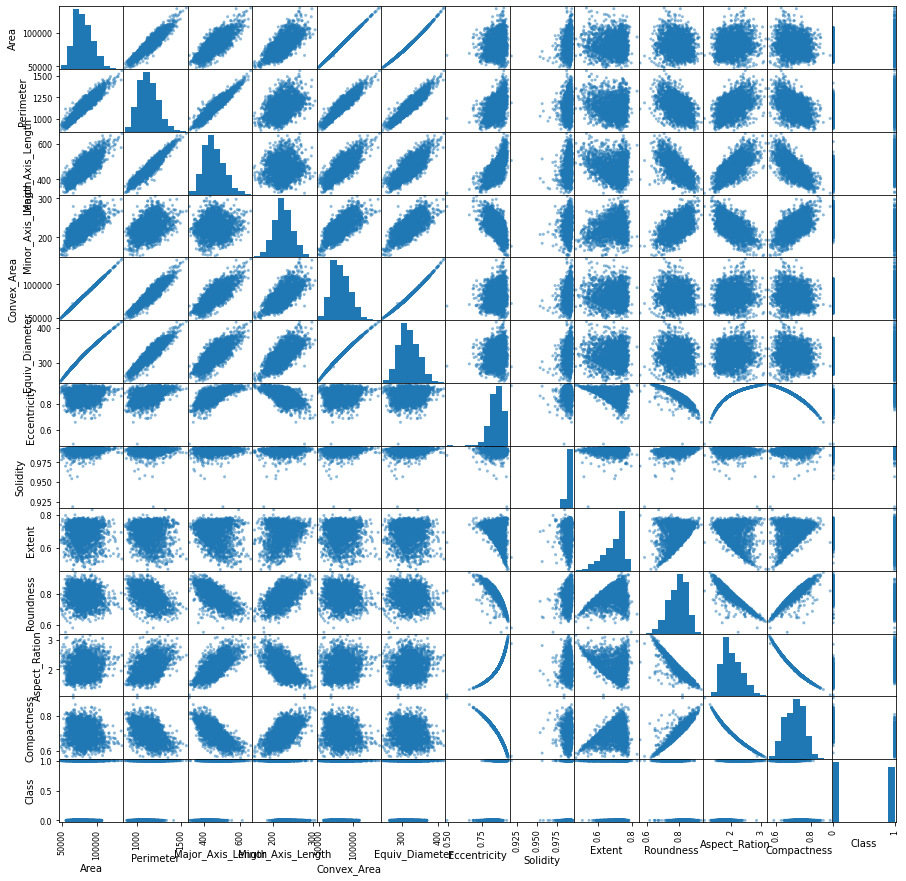

In [5]:
#plotting penyebaran data
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, alpha=0.5, figsize=(15, 15))
plt.show()

## **2.3.2. PLOTTING JUMLAH DATA**

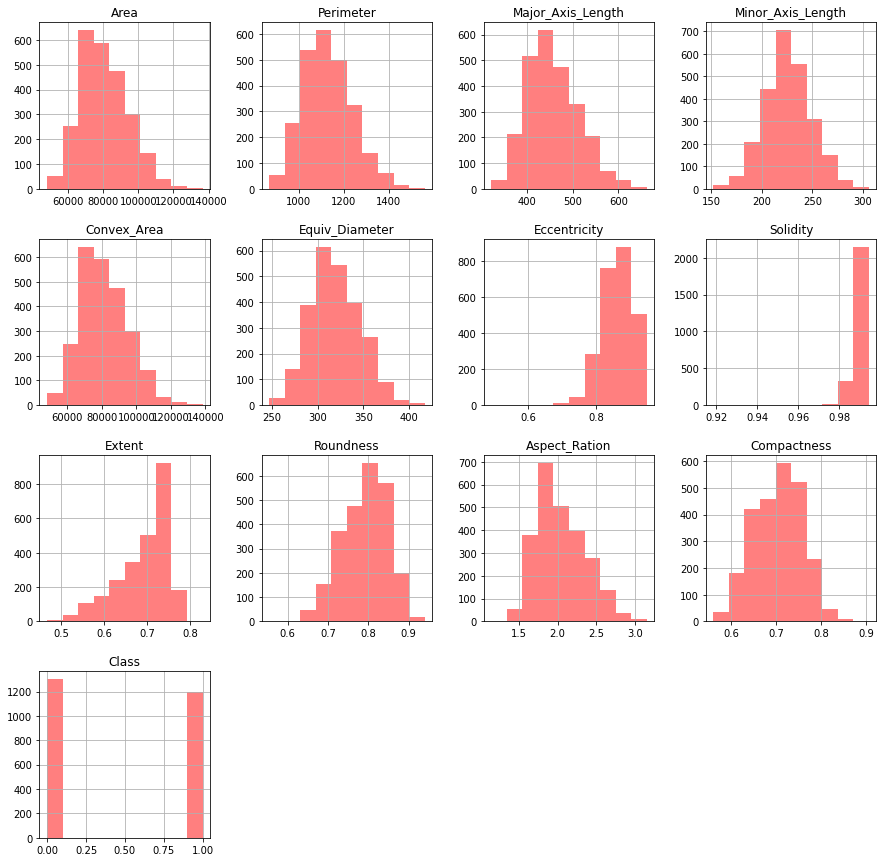

In [6]:
#plotting jumlah data
dataset.hist(alpha=0.5, figsize=(15, 15), color='red')
plt.show()

## **2.3.3. PLOTTING GRAFIK DATA**

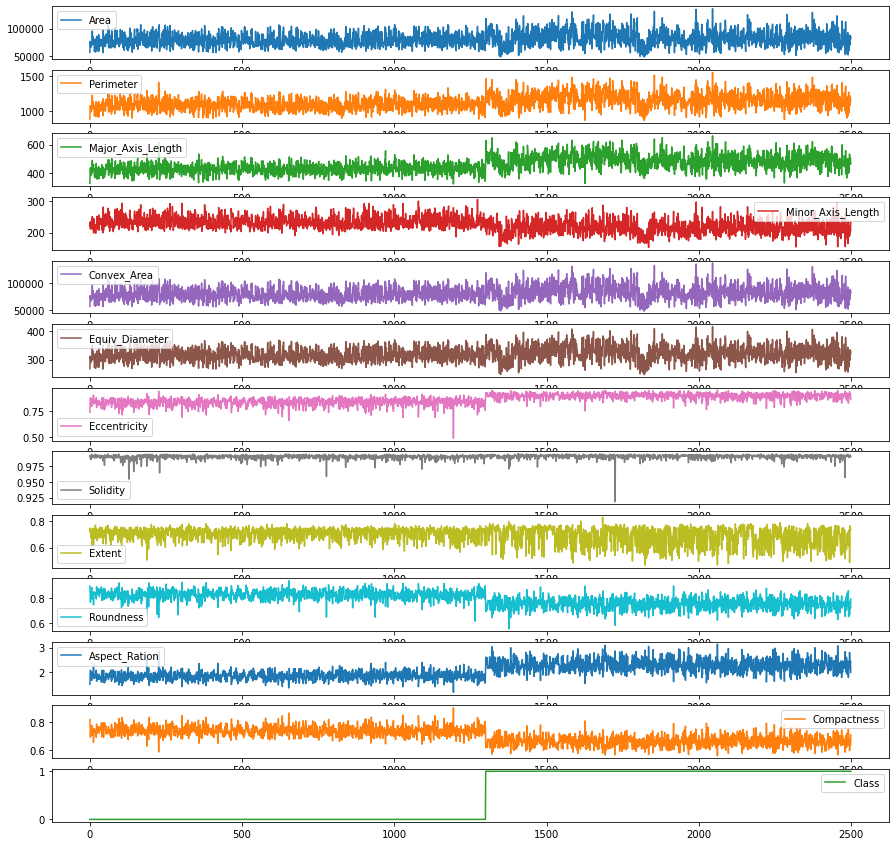

In [7]:
#plotting data dalam chart
dataset.plot(subplots=True, figsize=(15, 15), sharex=False, sharey=False)
plt.show()

## **2.4. PEMBAGIAN DATA**

In [8]:
# DEKLARASI CLASS TRAINING DAN TARGET
dataX = dataset.drop('Class',axis=1)
datay = dataset[['Class']]

# MENGUBAH SEMUA KOLOM MENJADI FLOAT (BAIK YANG SUDAH ATAU BELUM)
jumlah_clmns = dataX.select_dtypes(include=np.int_).columns.tolist()
for clmns in jumlah_clmns:
    dataX[clmns] = dataX[clmns].astype('float') #MENGUBAH MENJADI FLOAT
    
# PEMBAGIAN TRAINING DATA DAN TEST DATA [90-10 split]
X_train, X_test, y_train, y_test = train_test_split(dataX, datay, test_size=0.10, random_state=np.random.randint(1000))

### **2.4.1. PLOTTING KEPENTINGAN FITUR**

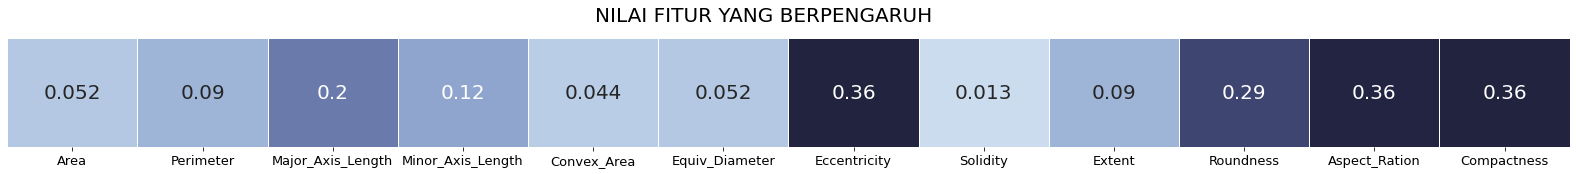

In [9]:
# MEMILIH KOLUMN YANG BERPENGARUH TERHADAP TARGET
informasi_dataset = mutual_info_classif(X_train, y_train, n_neighbors=5, copy = True)

plt.subplots(1, figsize=(28, 2))
sns.heatmap(informasi_dataset[:, np.newaxis].T, cmap=sns.color_palette("ch:start=.0,rot=-.1", as_cmap=True), cbar=False, linewidths=1, annot=True, annot_kws={"size": 20})
plt.yticks([], [])
plt.gca().set_xticklabels(dataX.columns, rotation=0, ha='center', fontsize=13)
plt.suptitle("NILAI FITUR YANG BERPENGARUH", fontsize=20, y=1.1)
plt.gcf().subplots_adjust(wspace=0.4)

**Data Yang Memiliki Pengaruh Penuh Terhadap Target Class:**

* Compactness 0.37
* Eccentricity 0.36
* Aspect_Ration 0.36
* Roundness 0.30
* Major_Axis_Length 0.2
* Minor_Axis_Length 0.13



# **3. IMPLEMENTASI MLP**

## **3.1. MEMILIH FITUR**

In [10]:
# MEMASUKAN 6 FITUR YANG BERPENGARUH
clmn_penting = ['Eccentricity', 'Roundness', 'Aspect_Ration', 'Compactness', 'Major_Axis_Length','Minor_Axis_Length']
X_new = dataX[clmn_penting]

# MENGGUNAKAN ROBUST SCALER
rs = RobustScaler()
X_scaled = rs.fit_transform(X_new)

## **3.2. PEMBAGIAN DATA BARU**

In [11]:
# split training & test data [90-10 split] -- again
X_train, X_test, y_train, y_test = train_test_split(X_scaled, datay, test_size=0.10, random_state=np.random.randint(1000))

# record stats
print(f"JUMLAH DATA TRAINING = {X_train.shape[0]} \nJUMLAH DATA TESTING = {X_test.shape[0]} ")

JUMLAH DATA TRAINING = 2250 
JUMLAH DATA TESTING = 250 


## **3.3. MEMBUAT MODEL MLP**

In [12]:
# MEMBUAT BENTUK MLP
input_shape = X_train.shape[1]                                                         
output_shape = y_train.shape[1]                                                           
batch_size = np.ceil(len(X_train) / 128).astype(int)                                     

# build model
model = models.Sequential()
# input layer
model.add(layers.Dense(batch_size,input_shape=(input_shape,),name='input_layer',activation='relu'))
# hidden layer
model.add(layers.Dense(8,name='hidden_layer1',activation='relu'))
# hidden layer
model.add(layers.Dense(16,name='hidden_layer2',activation='relu'))
# hidden layer
model.add(layers.Dense(32,name='hidden_layer3',activation='relu'))
# hidden layer
model.add(layers.Dense(64,name='hidden_layer4',activation='relu'))
# dropout layer
model.add(layers.Dropout(0.5))
# output layer
model.add(layers.Dense(output_shape,name='output_layer',activation='sigmoid'))
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# summmary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 18)                126       
                                                                 
 hidden_layer1 (Dense)       (None, 8)                 152       
                                                                 
 hidden_layer2 (Dense)       (None, 16)                144       
                                                                 
 hidden_layer3 (Dense)       (None, 32)                544       
                                                                 
 hidden_layer4 (Dense)       (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 output_layer (Dense)        (None, 1)                 6

In [13]:
print(input_shape)

6


# **4. TRAINING MLP**

In [14]:
# model fit params
epoch = 1000

# fit the keras model on the dataset
hist = model.fit(X_train,y_train,epochs = epoch,batch_size=batch_size,shuffle=True,validation_data=(X_test, y_test),verbose=0,callbacks=[TqdmCallback(verbose=1)])


100%|██████████| 1000/1000 [03:54<00:00,  4.26epoch/s, loss=0.151, accuracy=0.943, val_loss=0.938, val_accuracy=0.868]


# **5. HASIL AKURASI DAN JUMLAH ITERASI**

In [15]:
akurasi = '{:.2%}'.format(hist.history['accuracy'][-1])
print(f"Model mendapatkan jumlah akurasi {akurasi} dengan jumlah epoch {epoch}")

Model mendapatkan jumlah akurasi 94.31% dengan jumlah epoch 1000


# **6. PLOTTING HASIL AKURASI DAN PREDIKSI**

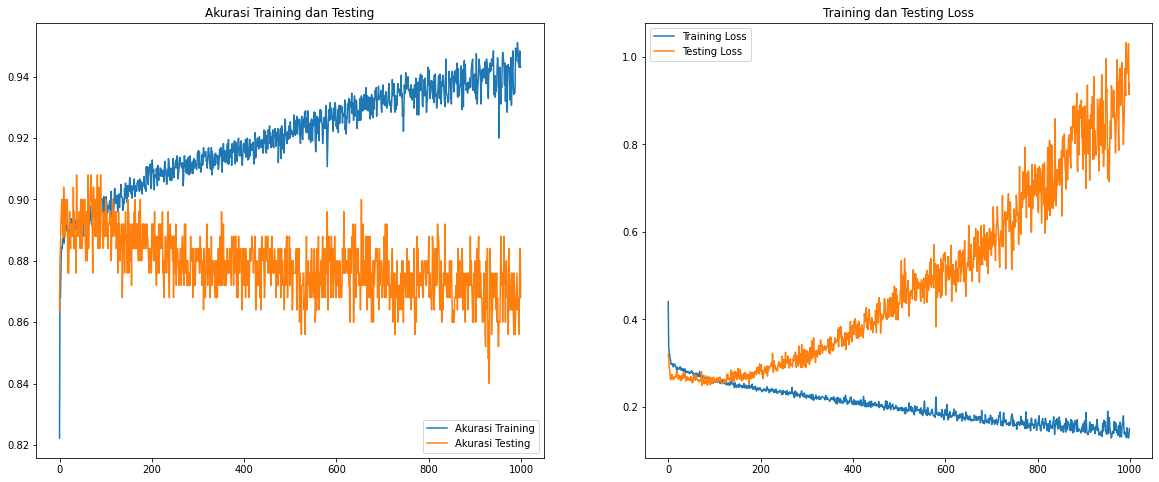

In [16]:
#MENAMPILKAN HASIL TRAINING DATA
akurasi = hist.history['accuracy']
nilai_akurasi = hist.history['val_accuracy']
loss = hist.history['loss']
nilai_loss = hist.history['val_loss']
epochs_range = range(epoch)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, akurasi, label='Akurasi Training')
plt.plot(epochs_range, nilai_akurasi, label='Akurasi Testing')
plt.legend(loc='lower right')
plt.title('Akurasi Training dan Testing')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, nilai_loss, label='Testing Loss')
plt.legend(loc='upper left')
plt.title('Training dan Testing Loss')
plt.show()

8/8 [==============================] - 0s 1ms/step


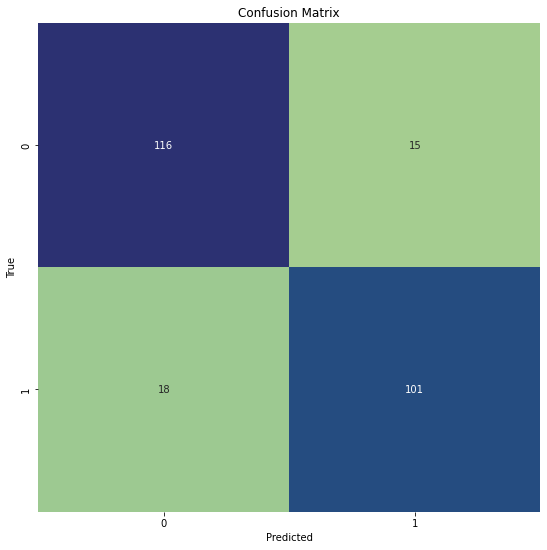

In [17]:
# Predictions 
y_pred = model.predict(X_test)
y_pred_class = [round(x[0]) for x in y_pred]
y_test_class = y_test.reset_index(drop=True)

# confusion matrix
cfm = confusion_matrix(y_test_class, y_pred_class)

# visualise confusion matrix
plt.figure(figsize=(9,9))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cfm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
sns.heatmap(cfm, annot=True, cmap='crest', cbar=False, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()